# Google Ads

Import necessary libraries for analysis

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

Import the dataset we are going to analyze

In [26]:
df=pd.read_excel("C:/Users/Dell/OneDrive/Υπολογιστής/AdWords exercise (dataset).xlsx")

Quick review of the data

In [27]:
df.head()

,Day,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value
0,2013-08-05,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.0,0.0,0,0.0
1,2013-08-08,1,100,1,3,0.3333,0.03,0.03,1.0,0,0.0,0.0,0,0.0
2,2013-08-10,1,100,0,4,0.0000,0.00,0.00,1.0,0,0.0,0.0,0,0.0
3,2013-08-14,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.0,0.0,0,0.0
4,2013-08-18,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.0,0.0,0,0.0


In [28]:
df.tail()

,Day,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value
5210,2013-09-25,15,536,342,65510,0.0052,0.05,17.29,1.0,7,2.47,0.0205,5,445.0
5211,2013-09-26,15,536,213,25635,0.0083,0.04,8.97,1.0,2,4.48,0.0094,1,104.0
5212,2013-09-27,15,536,899,111513,0.0081,0.04,39.51,1.0,2,19.76,0.0022,7,180.0
5213,2013-09-20,15,537,41,12677,0.0032,0.05,1.88,1.8,0,0.00,0.0000,0,0.0
5214,2013-09-21,15,537,70,20220,0.0035,0.05,3.31,2.2,0,0.00,0.0000,0,0.0


Check for missing values

In [29]:
df.isnull().sum()
#we observe that there are not any missing values so we don't have to make any modifications

Day                   0
Campaign              0
AdGroup               0
Clicks                0
Impressions           0
CTR                   0
Avg. CPC              0
Cost                  0
Avg. position         0
Conversions           0
Cost/conversion       0
Conversion rate       0
View-through conv.    0
Total conv. value     0
dtype: int64

Summary statistics table 

In [30]:
df.describe(include=[np.number])

,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000
mean,7.821860,336.455992,26.363758,2186.010355,0.246293,0.066899,1.393091,1.078447,0.730393,0.379914,0.017785,0.332311,46.144036
std,6.110752,161.383728,104.726371,8400.434701,0.340551,0.088975,4.397401,0.226418,3.815131,1.446853,0.073955,1.590337,242.678090
min,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,222.000000,1.000000,3.000000,0.002000,0.020000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,329.000000,3.000000,25.000000,0.008900,0.050000,0.180000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,508.000000,12.000000,829.000000,0.466700,0.080000,0.880000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,537.000000,1602.000000,148518.000000,2.000000,1.280000,77.870000,5.000000,75.000000,23.970000,1.000000,33.000000,5687.000000


We will evaluate the performance for each of these two months

In [31]:
#first we will create a new column on the original dataset 
df['Month']=df['Day'].dt.to_period('M')

monthly_per=df.groupby('Month').agg({'Clicks':'sum','Impressions':'sum',
                                    'CTR':'mean','Avg. CPC':'mean',
                                    'Cost':'sum','Conversions':'sum',
                                    'Conversion rate':'mean','Total conv. value':'sum'
                                    }).reset_index()



In [32]:
monthly_per.to_csv('monthly_per.csv')
monthly_per

,Month,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value
0,2013-08,61757,5507270,0.253785,0.068011,2996.56,1923,0.019841,130387.64
1,2013-09,75730,5892774,0.238249,0.065706,4268.41,1886,0.015578,110253.51


In [33]:
#we calculate the 'ROAS' (revenue/cost),this value indicates the return we gain for a single unit we spent
monthly_per['ROAS']=monthly_per['Total conv. value']/monthly_per['Cost']
monthly_per

,Month,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value,ROAS
0,2013-08,61757,5507270,0.253785,0.068011,2996.56,1923,0.019841,130387.64,43.512441
1,2013-09,75730,5892774,0.238249,0.065706,4268.41,1886,0.015578,110253.51,25.830112


In [34]:
#On the first month we gained 43.51 monetary units for every single one we spent and 25.83 on the second month.
#We observe that the performance has decreased significantly(~40%)

Visualization

In [35]:
monthly_per['Month']=monthly_per['Month'].astype('str')
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_per["Month"],y=monthly_per["ROAS"], 
                         mode='lines+markers', name='ROAS', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=monthly_per["Month"],y=monthly_per["Clicks"], 
                         mode='lines+markers', name='Clicks', line=dict(color='green')))

fig.add_trace(go.Scatter(x=monthly_per["Month"],y=monthly_per["Conversions"], 
                         mode='lines+markers', name='Conversions', line=dict(color='red')))

fig.add_trace(go.Scatter(x=monthly_per["Month"], y=monthly_per["Cost"], 
                         mode='lines+markers', name='Cost', line=dict(color='orange')))

fig.update_layout(title="Monthly Performance Trends",
                  xaxis_title="Month",
                  yaxis_title="Metric Value",
                  template="plotly_white")

fig.show()

# Observations

1)Clicks increased from 61757 to 75130
2)Conversions decreased from 1923 to 1886
2)Cost increased from 2996.56 to 4268.41
4)ROAS decresed from 43.51 to 25.83

On the  previous dataframe we will add one new column to show the percentage change through time

In [36]:
monthly_per_transposed=monthly_per.transpose()

monthly_per_transposed.columns=monthly_per_transposed.loc['Month']


monthly_per_transposed['% Change']=np.nan

monthly_per_transposed=monthly_per_transposed.iloc[1:]


monthly_per_transposed['% Change']= (monthly_per_transposed['2013-09']-monthly_per_transposed['2013-08'])/monthly_per_transposed['2013-08'] * 100


monthly_per_transposed

Month,2013-08,2013-09,% Change
Clicks,61757,75730,22.625775
Impressions,5507270,5892774,6.999911
CTR,0.253785,0.238249,-6.121543
Avg. CPC,0.068011,0.065706,-3.38966
Cost,2996.56,4268.41,42.443669
Conversions,1923,1886,-1.924077
Conversion rate,0.019841,0.015578,-21.484687
Total conv. value,130387.64,110253.51,-15.441747
ROAS,43.512441,25.830112,-40.637409


# Campaigns

We will group the data per campaign so we can evaluate each of them

In [37]:
campaign_per=df.groupby('Campaign').agg({'Clicks':'sum','Impressions':'sum',
                                        'CTR':'mean','Avg. CPC':'mean',
                                        'Cost':'sum','Conversions':'sum',
                                        'Conversion rate':'mean','Total conv. value':'sum'
                                        }).reset_index()
campaign_per

,Campaign,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value
0,1,67031,119726,0.529237,0.029732,1669.29,2509,0.021280,159383.39
1,3,4246,13054,0.382656,0.060789,320.94,53,0.006662,4731.30
2,7,3455,17677,0.235734,0.179960,929.57,42,0.008005,3188.10
3,15,62755,11249587,0.005126,0.063368,4345.17,1205,0.026348,73338.36


In [38]:
#calculate the ROAS
campaign_per['ROAS']=campaign_per['Total conv. value']/campaign_per['Cost']

campaign_per

,Campaign,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value,ROAS
0,1,67031,119726,0.529237,0.029732,1669.29,2509,0.021280,159383.39,95.479749
1,3,4246,13054,0.382656,0.060789,320.94,53,0.006662,4731.30,14.742008
2,7,3455,17677,0.235734,0.179960,929.57,42,0.008005,3188.10,3.429650
3,15,62755,11249587,0.005126,0.063368,4345.17,1205,0.026348,73338.36,16.878134


It's obvious that campaign number 1 is the most efficient by far.We could spent more on this campaign.

# Visualization

In [39]:
fig = go.Figure()

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["Cost"],
                     name="Cost",marker_color="orange"))

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["Conversions"],
                     name="Conversions",marker_color="green"))

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["ROAS"],
                     name="ROAS",marker_color="blue"))

fig.update_layout(
    title="Performance Analysis per Campaign",
    xaxis_title="Campaigns",
    yaxis_title="Metric Values",
    barmode="group", 
    template="plotly_white")

fig.show()

A more detailed bar chart

In [40]:
fig = go.Figure()

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["Cost"],
                     name="Cost",marker_color="orange"))

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["Conversions"],
                     name="Conversions",marker_color="green"))

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["ROAS"],
                     name="ROAS",marker_color="blue"))

fig.add_trace(go.Bar(x=campaign_per["Campaign"],y=campaign_per["Clicks"],
                     name="Clicks",marker_color="red"))

fig.add_trace(go.Scatter(x=campaign_per["Campaign"],y=campaign_per["Avg. CPC"],
                         name="CPC (€)",mode="lines+markers",marker=dict(color="purple", size=8)))

fig.update_layout(
    title="Performance Analysis per Campaign",
    xaxis_title="Campaigns",
    yaxis_title="Metric Values",
    barmode="group",  
    template="plotly_white")

fig.show()

Pie chart (ROAS)

In [41]:
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=campaign_per["Campaign"],
    values=campaign_per["ROAS"],
    textinfo="label+percent",
    insidetextorientation="radial",
    marker=dict(colors=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"])))

fig.update_layout(
    title="ROAS Distribution per Campaign",
    template="plotly_white")

fig.show()

Heatmap

In [42]:
normalized_data = campaign_per.set_index("Campaign")
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())

fig = go.Figure(data=go.Heatmap(
    z=normalized_data.values,
    x=normalized_data.columns,
    y=normalized_data.index,
    colorscale="RdYlGn", 
    text=normalized_data.round(2).values,
    texttemplate="%{text}",
    hoverinfo="text"))

fig.update_layout(
    title="Campaign Performance Heatmap (ROAS, Clicks, Conversions, Cost)",
    xaxis=dict(title="Performance Metrics"),
    yaxis=dict(title="Campaigns"),
    template="plotly_white")

fig.show()

Bar plot (CTR)

In [43]:
campaign_ctr = df.groupby("Campaign")["CTR"].mean().reset_index()


fig = go.Figure(data=[
    go.Bar(
        x=campaign_ctr["Campaign"],
        y=campaign_ctr["CTR"],
        marker=dict(color="royalblue"),
        text=campaign_ctr["CTR"].round(2),
        textposition="outside"
    )
])

fig.update_layout(
    title="CTR per Campaign",
    xaxis=dict(title="Campaigns"),
    yaxis=dict(title="Click-Through Rate (CTR)", tickformat=".2%"),
    template="plotly_white"
)

fig.show()

Bar plot (CPC & CTR)

In [44]:
campaign_metrics = df.groupby("Campaign")[["CTR", "Avg. CPC"]].mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=campaign_metrics["Campaign"],
    y=campaign_metrics["CTR"],
    name="CTR (%)",
    marker=dict(color="royalblue"),
    text=campaign_metrics["CTR"].round(2),
    textposition="outside",
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=campaign_metrics["Campaign"],
    y=campaign_metrics["Avg. CPC"],
    name="Avg CPC ($)",
    mode="lines+markers",
    marker=dict(color="red"),
    yaxis="y2"
))

fig.update_layout(
    title="CTR & CPC per Campaign",
    xaxis=dict(title="Campaigns"),
    yaxis=dict(title="Click-Through Rate (CTR %)", tickformat=".2%"),
    yaxis2=dict(title="Average CPC ($)", overlaying="y", side="right"),
    template="plotly_white",
    legend=dict(x=0.8, y=1.1)
)

fig.show()

# Campaign 1

In [45]:
df_3=df[df['Campaign']==1]

In [46]:
df_3

,Day,Campaign,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Avg. position,Conversions,Cost/conversion,Conversion rate,View-through conv.,Total conv. value,Month
0,2013-08-05,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.00,0.0000,0,0.00,2013-08
1,2013-08-08,1,100,1,3,0.3333,0.03,0.03,1.0,0,0.00,0.0000,0,0.00,2013-08
2,2013-08-10,1,100,0,4,0.0000,0.00,0.00,1.0,0,0.00,0.0000,0,0.00,2013-08
3,2013-08-14,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.00,0.0000,0,0.00,2013-08
4,2013-08-18,1,100,0,1,0.0000,0.00,0.00,1.0,0,0.00,0.0000,0,0.00,2013-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,2013-09-23,1,493,1602,2947,0.5436,0.02,35.43,1.0,45,0.79,0.0281,0,2805.61,2013-09
1079,2013-09-24,1,493,1443,2752,0.5243,0.02,30.85,1.0,47,0.66,0.0326,0,1934.10,2013-09
1080,2013-09-25,1,493,1406,2670,0.5266,0.02,31.30,1.0,41,0.76,0.0292,0,2531.31,2013-09
1081,2013-09-26,1,493,1561,2606,0.5990,0.02,32.55,1.0,30,1.08,0.0192,0,1908.10,2013-09


In [47]:
monthly_per_cam1=df_3.groupby('AdGroup').agg({'Clicks':'sum','Impressions':'sum',
                                    'CTR':'mean','Avg. CPC':'mean',
                                    'Cost':'sum','Conversions':'sum',
                                    'Conversion rate':'mean','Total conv. value':'sum'
                                    }).reset_index()

monthly_per_cam1['ROAS']=monthly_per_cam1['Total conv. value']/monthly_per_cam1['Cost']

monthly_per_cam1

,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value,ROAS
0,100,10,45,0.210143,0.013043,0.43,0,0.000000,0.00,0.000000
1,101,267,841,0.348581,0.050517,13.50,10,0.024159,523.00,38.740741
2,102,439,795,0.558524,0.024310,10.60,5,0.014369,335.00,31.603774
3,103,149,174,0.906252,0.018182,2.51,8,0.067964,393.00,156.573705
4,104,11870,20048,0.608298,0.024314,299.70,438,0.039808,28217.22,94.151552
5,105,204,323,0.643446,0.022143,4.89,8,0.024004,339.00,69.325153
6,106,28,57,0.467814,0.012759,0.48,0,0.000000,0.00,0.000000
7,107,1026,1858,0.556269,0.038621,40.25,40,0.035750,2424.49,60.235776
8,108,1009,1409,0.721491,0.026207,25.39,16,0.017109,1360.89,53.599449
9,109,72,145,0.492645,0.025098,2.51,1,0.003922,90.00,35.856574


In [48]:
fig = go.Figure(data=[
    go.Bar(
        x=monthly_per_cam1['AdGroup'],
        y=monthly_per_cam1["CTR"],
        marker=dict(color="royalblue"),
        text=monthly_per_cam1["CTR"].round(2),
        textposition="outside"
    )
])

fig.update_layout(
    title="CTR per AdGroup (Campaign 1)",
    xaxis=dict(title='AdGroup'),
    yaxis=dict(title="Click-Through Rate (CTR)", tickformat=".2%"),
    template="plotly_white"
)

fig.show()

# Performance Analysis for each Ad Group

In [49]:
adgroup_per=df.groupby("AdGroup").agg({
    "Clicks":"sum",
    "Impressions":"sum",
    "CTR": "mean",
    "Avg. CPC":"mean",
    "Cost":"sum",
    "Conversions":"sum",
    "Conversion rate":"mean",
    "Total conv. value":"sum"
}).reset_index()

adgroup_per["ROAS"]=adgroup_per["Total conv. value"]/adgroup_per["Cost"]

adgroup_per=adgroup_per.sort_values(by="ROAS", ascending=False)

adgroup_per

,AdGroup,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value,ROAS
32,218,17,70,0.246294,0.015556,0.68,1,0.013889,225.00,330.882353
19,119,20,38,0.618058,0.014167,0.40,2,0.062500,80.00,200.000000
3,103,149,174,0.906252,0.018182,2.51,8,0.067964,393.00,156.573705
90,493,47609,85088,0.561900,0.020862,1075.48,1851,0.039491,117816.69,109.548006
37,223,31,67,0.497143,0.024857,1.37,1,0.014286,143.00,104.379562
...,...,...,...,...,...,...,...,...,...,...
52,238,12,57,0.238890,0.016000,0.87,0,0.000000,0.00,0.000000
134,537,111,32897,0.003350,0.050000,5.19,0,0.000000,0.00,0.000000
77,263,0,2,0.000000,0.000000,0.00,0,0.000000,0.00,NaN
111,514,0,893,0.000000,0.000000,0.00,0,0.000000,0.00,NaN


In [50]:
adgroup_per.iloc[:,1:].describe()

,Clicks,Impressions,CTR,Avg. CPC,Cost,Conversions,Conversion rate,Total conv. value,ROAS
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,132.000000
mean,1018.422222,8.444477e+04,0.283719,0.057588,53.814593,28.214815,0.013031,1782.527037,22.354031
std,4667.707182,3.661563e+05,0.241347,0.049517,176.332737,165.375393,0.016881,10502.928590,41.511389
min,0.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,4.800000e+01,0.006802,0.024312,0.820000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,3.230000e+02,0.327245,0.049138,4.540000,1.000000,0.006034,59.000000,4.893305
75%,311.000000,1.695550e+04,0.446591,0.072171,25.880000,9.500000,0.019562,568.250000,31.672191
max,47609.000000,3.902249e+06,1.000000,0.295263,1465.230000,1851.000000,0.069986,117816.690000,330.882353


Visualization (AdGroups)

In [51]:
campaign_adgroup_pivot = df.pivot_table(index="AdGroup", columns="Campaign", values="CTR", aggfunc="mean")

# Heatmap
fig = go.Figure(data=go.Heatmap(
    z=campaign_adgroup_pivot.values,
    x=campaign_adgroup_pivot.columns,
    y=campaign_adgroup_pivot.index,
    colorscale="Blues",
    colorbar=dict(title="CTR (%)")
))

# Προσαρμογή γραφήματος
fig.update_layout(
    title="CTR Consistency Across Campaigns & Ad Groups",
    xaxis_title="Campaign",
    yaxis_title="Ad Group",
    template="plotly_white"
)

# Προβολή γραφήματος
fig.show()

In [52]:
df['Campaign']=df['Campaign'].astype('str')
fig = go.Figure()

for campaign in df["Campaign"].unique():
    fig.add_trace(go.Box(
        y=df[df["Campaign"]==campaign]["CTR"],
        name=campaign,
        boxmean=True))

fig.update_layout(
    title="CTR Distribution per Campaign",
    yaxis_title="CTR (%)",
    xaxis_title="Campaigns",
    template="plotly_white")

fig.show()

In [53]:
#the performance is effected by the groups

# Analyze the data on weekly base

In [54]:
weekly_per=df.groupby(pd.Grouper(key="Day", freq="W")).mean()

weekly_per["ROAS"]=weekly_per["Total conv. value"]/weekly_per["Cost"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_per.index,y=weekly_per["ROAS"],mode="lines+markers",name="ROAS"))

fig.update_layout(
    title="Weekly Performance Trends",
    xaxis_title="Week",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics")

fig.show()

Distribution of budget and performance

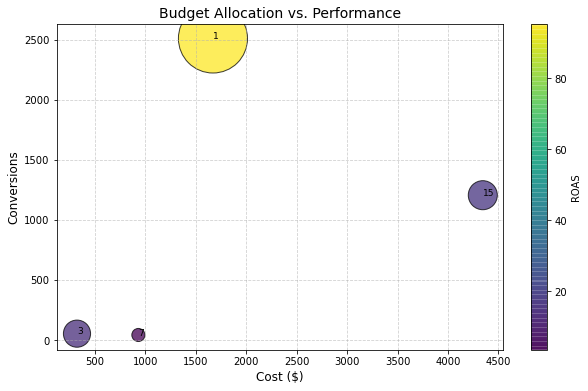

In [55]:
df_2=df[['Campaign','Cost','Total conv. value','Conversions']]

campaign_per=df_2.groupby("Campaign",as_index=False).sum()


campaign_per["ROAS"]=campaign_per["Total conv. value"]/campaign_per["Cost"]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    campaign_per["Cost"], 
    campaign_per["Conversions"], 
    s=campaign_per["ROAS"]*50,
    c=campaign_per["ROAS"], 
    cmap="viridis", 
    alpha=0.75, 
    edgecolors="black")

plt.colorbar(scatter, label="ROAS")

for i,campaign in enumerate(campaign_per["Campaign"]):
    plt.annotate(campaign,(campaign_per["Cost"][i],campaign_per["Conversions"][i]),fontsize=9)


plt.title("Budget Allocation vs. Performance",fontsize=14)
plt.xlabel("Cost ($)",fontsize=12)
plt.ylabel("Conversions",fontsize=12)
plt.grid(True, linestyle="--",alpha=0.6)

plt.show()

We observ that out budget hasn't been distributed properly

CTR vs CPC

In [56]:
campaign_performance = df.groupby("Campaign", as_index=False).mean()

if campaign_performance.empty:
    print("⚠️ Δεν υπάρχουν αρκετά δεδομένα για να δημιουργηθεί το γράφημα!")
else:
    # Δημιουργία Scatter Plot
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=campaign_performance["Avg. CPC"],
        y=campaign_performance["CTR"],
        mode="markers",
        marker=dict(
            size=campaign_performance["Cost"] / campaign_performance["Cost"].max() * 50,  # Κανονικοποίηση μεγέθους
            color=campaign_performance["CTR"],
            colorscale="Viridis",
            showscale=True
        ),
        text=campaign_performance["Campaign"],  # Όνομα καμπάνιας στο tooltip
        name="Campaigns"
    ))

    # Προσαρμογή γραφήματος
    fig.update_layout(
        title="CTR vs. CPC Insights",
        xaxis_title="Cost Per Click (CPC $)",
        yaxis_title="Click-Through Rate (CTR %)",
        template="plotly_white",
        legend_title="Campaigns"
    )

    # Προβολή γραφήματος
    fig.show()

